<a href="https://colab.research.google.com/github/jiw3026/SML/blob/main/bicycle01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 따릉이 대여량 예측 연습해보기 - DACON


In [ ]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=eef87715f717b63c184e68d799d8fec92e42a399e9fc3fc8f271bd3a8342eb2c
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 4.7 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
import mglearn

In [ ]:
%matplotlib inline
import seaborn as sns           
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SML/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SML/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SML/submission.csv')

In [ ]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

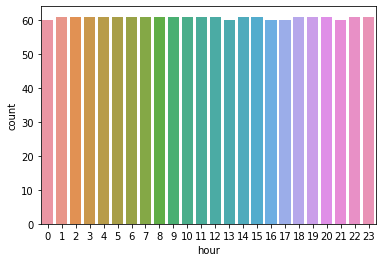

In [ ]:
sns.countplot(data = train, x= 'hour')

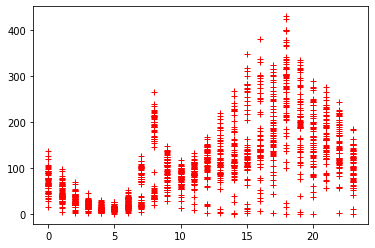

In [ ]:
plt.plot('hour', 'count', 'r+', data = train) #저녁 시간대에 가장 많이 사용함을 확인

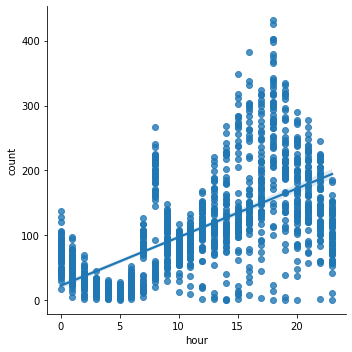

In [ ]:
sns.lmplot(x = 'hour', y = 'count', data = train) #저녁 시간대에 가장 많이 사용함을 확인

In [ ]:
it_train = train.copy()

it_train = IterativeImputer(random_state=2021).fit_transform(it_train)

itImp = pd.DataFrame(it_train)

column_names = ["dayid","hourid", "hour_bef_temperature", "hour_bef_precipitation","hour_bef_windspeed", "hour_bef_humidity", "hour_bef_visibility", "hour_bef_ozone", "hour_bef_pm10", "hour_bef_pm2.5", 'count']
itImp.columns = column_names

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
itImp_mid = itImp.copy()

for ilt in column_names:
  Q1 = itImp_mid[ilt].quantile(0.25)
  Q3 = itImp_mid[ilt].quantile(0.75)
  IQR = Q3-Q1
  train_delout = itImp_mid[(itImp_mid[ilt] < (Q1 - 1.5*IQR)) | itImp_mid[ilt] > (Q3 + 1.5*IQR) ]
  itImp_mid = itImp_mid.drop(train_delout.index, axis = 0)

In [ ]:
def busyHourGen(data, col):
  lst = data[col]
  lst_ = []
  for i in lst:
    if (6 < i < 10) or (16 < i < 20):
      lst_.append(1)
    else:
      lst_.append(0)
    data['busy_hour'] = lst_
    return data

In [ ]:
an = busyHourGen(itImp_mid, 'hourid')

In [ ]:
import numpy as np

In [ ]:
# X = an[an.columns.difference(['count', 'hour_bef_visibility'])]
# colls = X.columns.tolist()
# X = np.column_stack((X['hourid']**5, X['hour_bef_temperature']**4, X))
# y = an[['count']]

In [ ]:
# pipe_lr = maek_pipeline(MinMaxScaler(), LinearRegression())
# pipe_lr.fit(X_train, Y_train)
# y_pred = pipe_lr.predict(X_val)
# rmse = np.sqrt(mean_squared_error(y_val, y_pred))
# print("rmse of Linear Regression : {:.6f}".format(rmse))

In [ ]:
test_df = test.copy()
train_df = train.copy()

train_df = train_df.dropna()

y_train = train_df['count']

In [ ]:
train_df.head()
X_train = train_df.iloc[:, :-1]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = test_df.iloc[:, 1:]  # 30개 변수  -- iloc : 인덱스를 사용해서 dataframe의 행 출력
y = test.iloc[:, 0]   # target 변수 diagnosis 

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

# x는 독립변수 y는 종속변수, test_size의 default값은 0.25
# 아래 train - test 들의 순서 중요 -- 그대로 작성하세요~
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) #max_depth 설정 안함

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train) # 학습 완료
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train))) #overfitting 심함
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000


In [ ]:
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))

학습용 데이터 정확도: 1.000


In [ ]:
X = train_df.iloc[:, :-1]  # 30개 변수  -- iloc : 인덱스를 사용해서 dataframe의 행 출력
y = train_df['count']
X

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0
...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0


IndexError: ignored

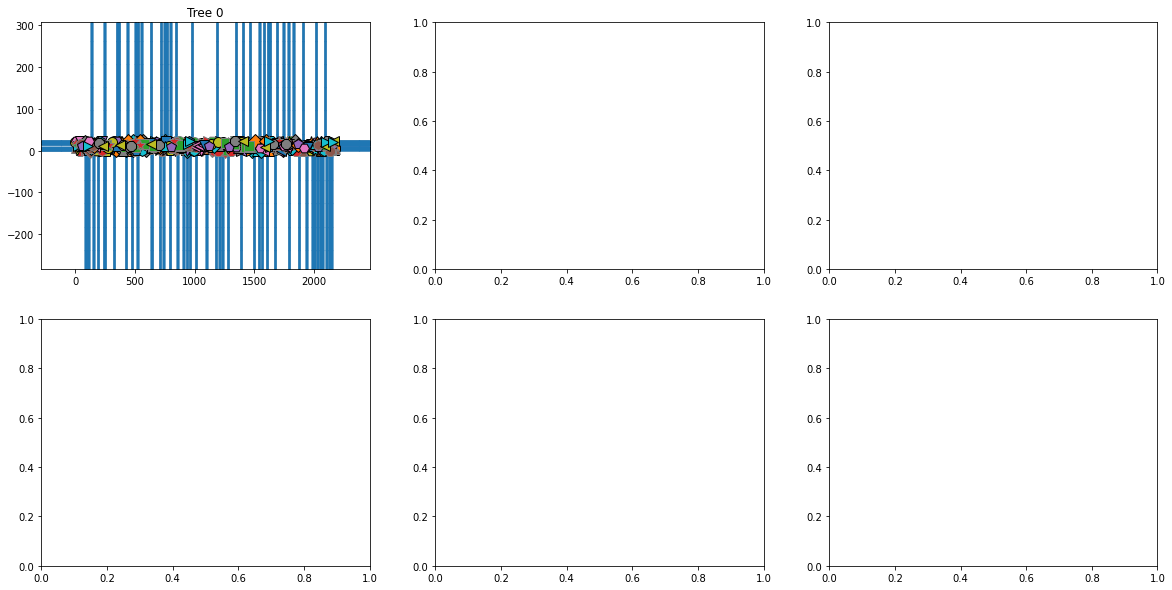

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# radius_mean, texture_mean 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용 - 여기서는 설명 생략
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [ ]:
X_test = test.dropna()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_test)
print(predict1)
#print(accuracy_score(test_y,predict1))

array([ 30., 138.,  49.,  86.,   2., 107., 201., 304.,  15.,  37., 122.,
        38., 138.,  86.,  92., 138.,  13.,  92.,  38., 138.,  15.,  86.,
       114., 215., 114.,  20., 135.,  87., 138.,  30.,  86.,  95., 113.,
        15., 114.,  92., 304.,  13., 113.,   7.,  37., 113., 205.,   9.,
        46.,  33., 113.,  86.,  13.,  93., 113., 189.,  52., 113.,  20.,
        15.,  50.,  87., 113., 113., 186., 113.,   9., 304., 112.,  33.,
        85., 170.,  87.,  15., 113., 113.,  11., 113.,  38., 170., 113.,
       106.,  11.,  15.,  87., 113., 304.,  52., 114., 138., 113.,  85.,
        86.,  20.,  11.,  11., 135., 124.,  11., 113.,  87.,  15.,   1.,
        87.,  15., 304., 165.,  95., 214., 113., 107., 106.,  92.,  20.,
       214.,  11., 114.,  13.,   2., 124.,  86., 189.,  20., 127., 113.,
        46., 106., 113., 106.,  40., 109., 113.,  87.,  15.,  15.,  40.,
        86.,  87.,  86.,  85., 113., 304., 106., 214., 113., 304.,  13.,
         8., 189.,  20.,  86., 127., 106.,  86., 11

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = train_df.iloc[:, :-1]  # 30개 변수  -- iloc : 인덱스를 사용해서 dataframe의 행 출력
y = train_df['count']   # target 변수 diagnosis 

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# x는 독립변수 y는 종속변수, test_size의 default값은 0.25
# 아래 train - test 들의 순서 중요 -- 그대로 작성하세요~
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) #max_depth 설정 안함

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train) # 학습 완료
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train))) #overfitting 심함
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.021


In [ ]:
# 의사결정나무의 깊이를 4로 제한하면 시험용 데이터에 대한 성능이 향상됨 (과적합을 줄임)
# 과적합(overfitting): 학습용 데이터에 대해서만 성능이 좋고 새로운 데이터에 적용했을 경우에는 성능이 좋지 않은 경우
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.060
시험용 데이터 정확도: 0.015
